In [2]:
from uncertainties import ufloat

Cd = ufloat(0.62,0.05)
D = ufloat(2,0.01)
d = ufloat(1,0.01)

beta = d/D

k_orifice = (beta**(-4)-1)/Cd**2

print("k value for orifice: ", k_orifice)

k value for orifice:  39+/-7


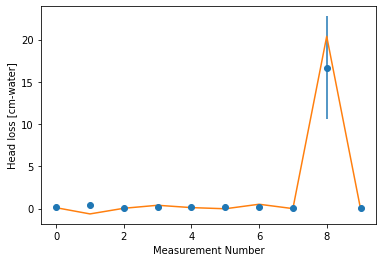

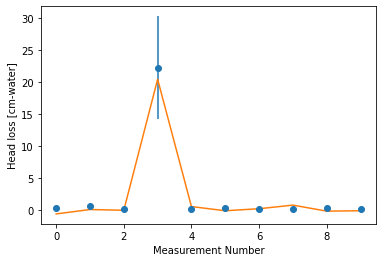

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from uncertainties import ufloat
from uncertainties import unumpy

rho = ufloat(1.2097,0.0007)
mu = ufloat(1.8317e-5,0.0005e-5)

g = 9.8

roughness = ufloat(0.0015/1000, 0.0001/1000)

files = ["pressure profile 1.csv", "pressure profile 2.csv"]
flow_rate_values = [ufloat(0.0168,0.0018), ufloat(0.0194,0.0020)]
blower_head_values = [20.6954, 20.4802]


for n in range(2):
    
    flow_rate = flow_rate_values[n]
    blower_head = blower_head_values[n]
    
    data = np.genfromtxt(files[n], delimiter=',', skip_header=1)
    
    length = unumpy.uarray(data[:,0], data[:,1]) #create length array with error values
    diameter = unumpy.uarray(data[:,2], data[:,3]) #create diameter array with error values
    rise = unumpy.uarray(data[:,4], data[:,5]) #create k array with error values
    k = unumpy.uarray(data[:,6], data[:,7]) #create k array with error values
    true_head_change = data[:,8]
    
    velocity = flow_rate/(3.1416*diameter**2/4)
    Re = velocity*rho*diameter/mu
    relative_roughness = roughness/diameter
    
    friction_factor = 1.325/(unumpy.log(relative_roughness/3.7 + 5.74/Re**0.9))**2
    
    major_loss = (friction_factor*length*velocity**2)/(diameter*2*g)
    minor_loss = k*velocity**2/(2*g)
    
    head_change = minor_loss+major_loss+rise
    
    head_change = head_change*rho*100/998 #convert to cm-water
    
    x = np.arange(len(head_change))
    
    plt.figure(n)
    
    plt.errorbar(x, y = unumpy.nominal_values(head_change), yerr=unumpy.std_devs(head_change),fmt='o')  
    plt.ylabel("Head loss [cm-water]")
    plt.xlabel("Measurement Number")
    plt.plot(true_head_change)